**Machine Learning Project**

Sum up of the project

Can we predict the risk of developing a tumor based on an individual’s symptoms? We aim to design a simple artificial intelligence system that determines whether a patient should be concerned given their observed symptoms. Using Python and basic machine learning tools, we will train a supervised classification model on a disease–symptom dataset.

*The data*

We use Disease-Symptom Dataset under World Bank license and found in https://www.kaggle.com/datasets/dhivyeshrk/diseases-and-symptoms-dataset. This dataset could not be used in a real research project, but is relevant for a project aimed at manipulating and understanding machine learning. It contains a list of 773 unique diseases associated with 377 symptoms. Theses symptoms are coded as dummy variable: 1 if the symptom is relevant to the disease, 0 otherwise. We end up with 246,000 samples.

**Taking a look at the data**

In [4]:
import pandas as pd

df = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

# Je crée un sample pour que ça tourne plus vite
df_sample = df.sample(1000).copy()
df.sample(10)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
105981,hemiplegia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224556,adhesive capsulitis of the shoulder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49360,neuralgia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224024,strep throat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245790,spondylolisthesis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119740,tooth disorder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32941,pulmonary congestion,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14088,restless leg syndrome,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41939,injury to the arm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78807,anxiety,0,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(246945, 378)

There are 246,945 observations for 378 variables. We need to clean this a bit to make it more useful and relevant.

In [3]:
df.dtypes

diseases                            object
anxiety and nervousness              int64
depression                           int64
shortness of breath                  int64
depressive or psychotic symptoms     int64
                                     ...  
hip weakness                         int64
back swelling                        int64
ankle stiffness or tightness         int64
ankle weakness                       int64
neck weakness                        int64
Length: 378, dtype: object

In [5]:
df.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,...,246945.0,246945.0,246945.0,246945.0,246945.000000,246945.0,246945.0,246945.0,246945.000000,246945.0
mean,0.039235,0.042746,0.086440,0.061001,0.097252,0.069943,0.039410,0.040572,0.037871,0.024876,...,0.0,0.0,0.0,0.0,0.001385,0.0,0.0,0.0,0.000073,0.0
std,0.194155,0.202285,0.281014,0.239333,0.296302,0.255051,0.194568,0.197296,0.190884,0.155747,...,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.008537,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0


In [6]:
# Let's take a look at the number of diseases we have:
len(df["diseases"].unique())
# There are 773 of them, let's take a look some of them:
for disease in df_sample["diseases"].unique():
    print(f"number of {disease}: {df_sample["diseases"].value_counts()[disease]}")
# Some are numerous, others are few

number of chronic glaucoma: 2
number of torticollis: 3
number of personality disorder: 2
number of fracture of the patella: 2
number of chronic otitis media: 3
number of arrhythmia: 3
number of peripheral nerve disorder: 5
number of neuralgia: 4
number of hyperkalemia: 3
number of ankylosing spondylitis: 1
number of macular degeneration: 5
number of pilonidal cyst: 2
number of hypoglycemia: 6
number of anxiety: 6
number of noninfectious gastroenteritis: 7
number of gastritis: 2
number of drug abuse (methamphetamine): 4
number of psoriasis: 3
number of trichomonas infection: 2
number of fracture of the shoulder: 3
number of knee ligament or meniscus tear: 2
number of eczema: 5
number of trigeminal neuralgia: 1
number of postoperative infection: 1
number of dry eye of unknown cause: 5
number of mononucleosis: 2
number of strep throat: 5
number of peritonitis: 3
number of complex regional pain syndrome: 4
number of injury to the leg: 2
number of oppositional disorder: 4
number of juvenile

**Pre-processing**

Due to our poor skills in medicine, and to improve both efficiency and relevance, we will use an AI to store the diseases into larger, more comprehensive categories. We will ask it to do it just as we saw in class, with a "if ... in disease... yada yada".

In [7]:
def group_disease(disease):
    disease = disease.lower()
    
    # Maladies cardiovasculaires
    if any(x in disease for x in ["heart", "coronary", "hypertension", "cardiomyopathy", "aortic", "stroke", "ischemia", "atrial", "valve", "arrhythmia", "thrombosis", "embolism", "angina", "arterial", "vascular"]):
        return "cardiovascular"
    
    # Maladies respiratoires
    elif any(x in disease for x in ["asthma", "copd", "emphysema", "pulmonary", "bronchiolitis", "respiratory", "pneumonia", "bronchitis", "breath", "lung", "tracheal", "laryngeal", "pleural", "pneumothorax"]):
        return "respiratory"
    
    # Maladies métaboliques / endocriniennes
    elif any(x in disease for x in ["diabetes", "thyroid", "obesity", "metabolic", "hypoglycemia", "hyperglycemia", "parathyroid", "pituitary", "adrenal", "hormone", "cushing", "graves", "hashimoto"]):
        return "metabolic_endocrine"
    
    # Maladies neurologiques / mentales
    elif any(x in disease for x in ["depression", "anxiety", "parkinson", "dementia", "adhd", "migraine", "epilepsy", "neuropathy", "stroke", "disorder", "bipolar", "schizophrenia", "psychotic", "panic", "ptsd", "traumatic", "stress", "mental", "neurological", "brain", "alzheimer", "huntington", "als", "sclerosis", "palsy", "nerve"]):
        return "neurological_psych"
    
    # Maladies digestives / hépatiques
    elif any(x in disease for x in ["liver", "gastro", "pancreatitis", "esophagus", "stomach", "intestinal", "ulcer", "nash", "hepatitis", "crohn", "colitis", "ibs", "diverticular", "cirrhosis", "cholecyst", "bile", "bowel"]):
        return "digestive_hepatic"
    
    # Maladies rénales / urologiques
    elif any(x in disease for x in ["kidney", "renal", "urethral", "bladder", "prostate", "urine", "urinary", "urologic", "uric", "urea"]):
        return "renal_urological"
    
    # Maladies infectieuses
    elif any(x in disease for x in ["infection", "viral", "bacterial", "fungal", "dengue", "hiv", "malaria", "tuberculosis", "meningitis", "sepsis", "pneumonia", "hepatitis", "herpes", "gonorrhea", "chlamydia", "syphilis", "lyme", "fever", "cold", "flu", "wart", "lice", "scabies"]):
        return "infectious"
    
    # Maladies musculo-squelettiques
    elif any(x in disease for x in ["fracture", "injury", "arthritis", "osteoporosis", "spine", "knee", "shoulder", "ankle", "foot", "hip", "bone", "cartilage", "tendon", "ligament", "muscle", "sprain", "strain", "dislocation", "bursitis", "carpal tunnel"]):
        return "musculoskeletal"
    
    # Maladies dermatologiques
    elif any(x in disease for x in ["skin", "dermatitis", "eczema", "psoriasis", "rash", "acne", "wound", "burn", "ulcer", "sore", "wart", "fungal", "abscess", "cyst", "mole", "lesion", "blister", "impetigo"]):
        return "dermatological"
    
    # Maladies oncologiques
    elif any(x in disease for x in ["cancer", "tumor", "carcinoma", "lymphoma", "sarcoma", "leukemia", "malignant", "ependymoma", "meningioma", "adenoma", "polyp"]):
        return "oncology"
    
    # Maladies gynécologiques / obstétriques
    elif any(x in disease for x in ["pregnancy", "uterine", "ovarian", "endometriosis", "fibroids", "menopause", "vagina", "placenta", "cervix", "womb", "female", "gynecolog", "obstetric", "natal", "abortion", "ectopic", "preeclamp"]):
        return "gynecological_obstetric"
    
    # Maladies ophtalmologiques / auditives
    elif any(x in disease for x in ["eye", "glaucoma", "retina", "vision", "hearing", "tinnitus", "otitis", "ocular", "conjunctivitis", "cataract", "cornea", "optic", "visual", "deaf", "ear", "auditory"]):
        return "ophthalmology_audiology"
    
    # Maladies hématologiques / immunologiques
    elif any(x in disease for x in ["anemia", "bleeding", "coagulation", "immunodeficiency", "leukemia", "lymphoma", "sickle", "hemophil", "thrombocyt", "polycyth"]):
        return "hematological_immunological"
    
    # Autres / non classés
    else:
        return "other"

df["group diseases"] = df["diseases"].apply(group_disease)
#df_sample["group diseases"] = df["diseases"].apply(group_disease)

# In case here is the list of the above grouped categories:
#["cardiovascular", "respiratory", "metabolic_endocrine", "neurological_psych", "digestive_hepatic", "renal_urological", "infectious", "musculoskeletal", "dermatological", "oncology", "gynecological_obstetric", "ophthalmology_audiology", "hematological_immunological", "other"]

Now that we have grouped many of them, let's take some time to look at them again: 

In [8]:
df.head(10).style

for disease in df["group diseases"].unique():
    print(f"number of {disease}: {df["group diseases"].value_counts()[disease]}")

number of neurological_psych: 29611
number of oncology: 2162
number of other: 104838
number of musculoskeletal: 17141
number of dermatological: 16460
number of metabolic_endocrine: 2078
number of ophthalmology_audiology: 13379
number of gynecological_obstetric: 6289
number of digestive_hepatic: 12872
number of cardiovascular: 11142
number of respiratory: 8220
number of hematological_immunological: 2635
number of infectious: 14021
number of renal_urological: 6097


Should we remove all the other category? I think so, as they are not relevant to compute our tumor, but we will see that.

Now, lets turn to our features: the symptoms. They may be too numerous. The IA mention doing a variance threshold method, I look at the documentation on the Internet and try to apply it with the help of the AI.
For the AI, a threshold of 0.01 or 0.05 seem relevant. In any case, the goal is to remove features that are too constant between diseases to be relevant; they do not allow to differentiate between disease

In [9]:
from sklearn.feature_selection import VarianceThreshold
# First, let's identify which columns are symptom features (not metadata)
# Assuming 'diseases' and 'group diseases' are the target/metadata columns

symptom_columns = [col for col in df.columns if col not in ['diseases', 'group diseases']]
X = df[symptom_columns]

print(f"Initial number of symptoms: {len(symptom_columns)}")
print(f"Dataset shape: {X.shape}")

# Apply Variance Threshold
# For binary features (0/1), threshold is based on Var(X) = p(1-p)
# threshold=0.01 removes features that appear in less than ~1% or more than ~99% of cases
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X)

# Get the names of selected features
selected_features = X.columns[selector.get_support()].tolist()
removed_features = X.columns[~selector.get_support()].tolist()

print(f"\nAfter variance threshold (0.01):")
print(f"Number of symptoms remaining: {len(selected_features)}")
print(f"Number of symptoms removed: {len(removed_features)}")
print(f"New shape: {X_filtered.shape}")

# Show some removed features (the ones with very low variance)
print(f"\nSample of removed symptoms (low variance):")
print(removed_features[:10])


Initial number of symptoms: 377
Dataset shape: (246945, 377)

After variance threshold (0.01):
Number of symptoms remaining: 146
Number of symptoms removed: 231
New shape: (246945, 146)

Sample of removed symptoms (low variance):
['breathing fast', 'throat swelling', 'lump in throat', 'throat feels tight', 'groin mass', 'emotional symptoms', 'elbow weakness', 'back weakness', 'pus in sputum', 'symptoms of the scrotum and testes']


In [10]:
# Create a new dataframe with only selected symptoms + target/metadata columns
df_cleaned = df[['group diseases'] + ['diseases'] + selected_features].copy()

print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"\nCleaned dataset columns: {df_cleaned.columns.tolist()[:10]}... (showing first 10)")

# You can adjust the threshold if needed:
# threshold=0.001 -> removes very rare symptoms (stricter)
# threshold=0.05  -> removes more symptoms (less strict)
# threshold=0.0   -> keeps all features with any variance


Cleaned dataset shape: (246945, 148)

Cleaned dataset columns: ['group diseases', 'diseases', 'anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness', 'insomnia', 'abnormal involuntary movements']... (showing first 10)


In [11]:
df_cleaned

,group diseases,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,...,sweating,swollen eye,symptoms of bladder,itching of skin,"skin dryness, peeling, scaliness, or roughness",skin irritation,warts,skin rash,low self-esteem,mouth pain
0,neurological_psych,panic disorder,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,neurological_psych,panic disorder,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,neurological_psych,panic disorder,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,neurological_psych,panic disorder,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,neurological_psych,panic disorder,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def extract_group_int(disease:str):
    if disease == "cardiovascular":
        return 0
    elif disease == "respiratory":
        return 1
    elif disease == "metabolic_endocrine":
        return 2
    elif disease == "neurological_psych":
        return 3
    elif disease == "digestive_hepatic":
        return 4
    elif disease == "renal_urological":
        return 5
    elif disease == "infectious":
        return 6
    elif disease == "musculoskeletal":
        return 7
    elif disease == "dermatological":
        return 8
    elif disease == "oncology":
        return 9
    elif disease == "gynecological_obstetric":
        return 10
    elif disease == "ophthalmology_audiology":
        return 11
    elif disease == "hematological_immunological":
        return 12   
    elif disease == "other":
        return 13  


df_cleaned["Response"] = df_cleaned["group diseases"].apply(extract_group_int)

Now we are going to train the model, just as in the colortree exercise, to predict the disease from the syptoms. 

In [13]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Instanciate needed parameters and set the random seed to be reproductible
test_ratio = 0.2
seed_n = 42
np.random.seed(seed_n)

# Define X and Y
X = df_cleaned[[col for col in df_cleaned.columns if col not in ['group diseases']or col not in ['diseases'] or col not in ['Response']]]
Y = df_cleaned["Response"]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_ratio, random_state=seed_n)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

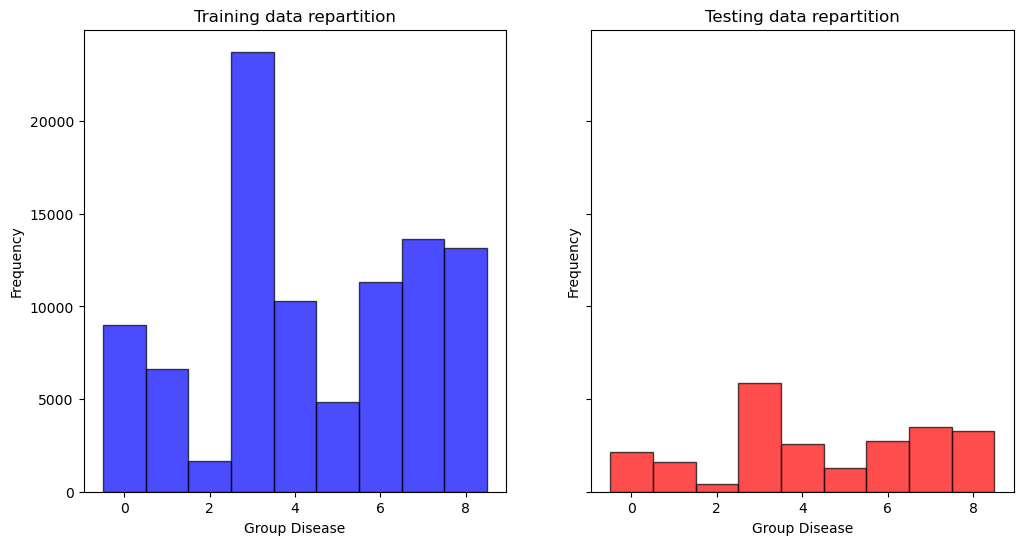

In [14]:
plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].hist(Y_train, bins=np.arange(0, 10) - 0.5, edgecolor="black", alpha=0.7, color="blue")
axes[1].hist(Y_test, bins = np.arange(0,10) - 0.5, edgecolor = "black", alpha = 0.7, color = "red")
axes[0].set(title='Training data repartition', ylabel='Frequency', xlabel='Group Disease')
axes[1].set(title='Testing data repartition', ylabel='Frequency', xlabel='Group Disease')
plt.show

We could play with the splitting repartition: here it looks satisfying tho

<span style="color:red">
Outline to do:
- Vary features selections and compare
- Vary models / process
- Plot nice graphs (eg confusion matrix)
- Research question?
- READ RELATED PAPERS

</span>

Following the outline of the exercise_S4, we test different models. We already know that we are in a classification problem, and thus computing the MSE seems unrelevant; the MSE would be greater if class 9 is predicted as class 1 than if class 9 is predicted as class 8, which does not mean anything in a classification problem. Thus we focus on precision, recall and f1-score, namely with confusion matrix.

Here are the definition of these metrics (as written in exercise s4):

    - A confusion matrix is a table giving the false positive, the false negative, the true positive and the true negative.
    - The precision measures how often a machine learning model correctly predicts the positive class. It is then computed as TP/ (TP + FP) where TP are true positive, and FP false positive.
    - The Recall stat measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. It is computed as TP/P (number of true positive on the number of positives)
    - The Fscore summarize a classification model accuracy. It is computed as 2 * (precision * recall) / (precision + recall).





In [15]:
# Imports
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import time

# Prepare data as numpy arrays
X = df_cleaned[[col for col in df_cleaned.columns if col not in ['group diseases', 'diseases', 'Response']]].to_numpy()
Y = df_cleaned["Response"].to_numpy()

# Models dictionary with CONSTRUCTORS (not instances)
models = {
    "Decision Trees (CART)": DecisionTreeClassifier,
    "k Nearest Neighbors (kNN)": lambda: KNeighborsClassifier(n_neighbors=5, n_jobs=-1),  # n_jobs=-1 for parallelization
    "Bagging Trees": BaggingClassifier,
    "Boosting Trees": lambda: GradientBoostingClassifier(max_depth=3, learning_rate=0.1, n_estimators=50)  # Faster params
}

# k-folds Cross-validation setup
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=seed_n)

# Storage for results
results = {}

# Iterate over models
for model_name, ModelClass in models.items():
    print(f"\n{'='*60}")
    print(f"Evaluating model: {model_name}")
    print(f"{'='*60}")
    
    fold_conf_matrices = []  # To store confusion matrices for each fold
    fold_precision = []      # To store precision scores for each fold
    fold_recall = []         # To store recall scores for each fold
    fold_fscore = []         # To store F1 scores for each fold
    
    # Cross-validation loop
    fold_num = 1
    for train_index, test_index in kf.split(X):
        start_time = time.time()
        
        # Split the data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        # CREATE A FRESH MODEL INSTANCE FOR THIS FOLD
        if callable(ModelClass):
            model = ModelClass()
        else:
            model = ModelClass
        
        # Train the model
        model.fit(X_train, Y_train)
        
        # Predict on the test set
        Y_pred = model.predict(X_test)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(Y_test, Y_pred, labels=np.unique(Y))
        fold_conf_matrices.append(conf_matrix)
        
        # Compute standard precision, recall and F1-score
        precision = precision_score(Y_test, Y_pred, average="macro", zero_division=1)
        recall = recall_score(Y_test, Y_pred, average="macro", zero_division=1)
        fscore = f1_score(Y_test, Y_pred, average="macro", zero_division=1)
        fold_precision.append(precision)
        fold_recall.append(recall)
        fold_fscore.append(fscore)
        
        elapsed = time.time() - start_time
        print(f"  Fold {fold_num}/{k} - Time: {elapsed:.2f}s - Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {fscore:.3f}")
        
        fold_num += 1

    # Average precision, recall and F1 score across all folds
    avg_precision = np.mean(fold_precision)
    avg_recall = np.mean(fold_recall)
    avg_fscore = np.mean(fold_fscore)

    # Convert list of confusion matrices to a 3D numpy array, and compute its average
    conf_matrices = np.array(fold_conf_matrices)
    mean_conf_matrix = np.mean(conf_matrices, axis=0)
    
    # Store results
    results[model_name] = {
        "Confusion Matrices": fold_conf_matrices,
        "Mean CM": mean_conf_matrix,
        "Average Precision": avg_precision,
        "Average Recall": avg_recall,
        "Average F1 score": avg_fscore
    }

# Display final results
print("\n" + "="*60)
print("FINAL RESULTS (Cross-Validation)")
print("="*60)
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Average Precision: {metrics['Average Precision']:.4f}")
    print(f"  Average Recall: {metrics['Average Recall']:.4f}")
    print(f"  Average F1-score: {metrics['Average F1 score']:.4f}")


Evaluating model: Decision Trees (CART)
  Fold 1/5 - Time: 14.85s - Precision: 0.831, Recall: 0.831, F1: 0.831
  Fold 2/5 - Time: 13.64s - Precision: 0.834, Recall: 0.830, F1: 0.832
  Fold 3/5 - Time: 13.44s - Precision: 0.829, Recall: 0.827, F1: 0.828
  Fold 4/5 - Time: 13.02s - Precision: 0.828, Recall: 0.825, F1: 0.826
  Fold 5/5 - Time: 14.10s - Precision: 0.831, Recall: 0.823, F1: 0.827

Evaluating model: k Nearest Neighbors (kNN)
  Fold 1/5 - Time: 361.61s - Precision: 0.789, Recall: 0.796, F1: 0.792
  Fold 2/5 - Time: 326.30s - Precision: 0.782, Recall: 0.798, F1: 0.789
  Fold 3/5 - Time: 316.78s - Precision: 0.780, Recall: 0.792, F1: 0.785
  Fold 4/5 - Time: 309.32s - Precision: 0.786, Recall: 0.787, F1: 0.786
  Fold 5/5 - Time: 318.71s - Precision: 0.787, Recall: 0.797, F1: 0.792

Evaluating model: Bagging Trees
  Fold 1/5 - Time: 85.28s - Precision: 0.843, Recall: 0.830, F1: 0.836
  Fold 2/5 - Time: 84.79s - Precision: 0.849, Recall: 0.831, F1: 0.840
  Fold 3/5 - Time: 85.64

One hurdle is the computing time, specifically for the KNN estimator (360s per fold) and boosting trees (1000s per fold). We could use a sample, but due to the imbalance of our dataset, I was afraid to lose too much information. Still, in the next chunk I will try either to select one single model, or to use a sample.

In fact, I think it is interesting as it is: precision is essential, but computing time is also a factor to consider. Thus, we decide not to use KNN and boosting trees, in order to keep a sample size relevant.

Then, we choose to stay stil very close to the exercise_s4, as we were given a classification analysis in good conditions. We keep in mind that the objective is to play with those once we have a working model, to see how they behave.
Thus the next step is to plot confusion matrixes; we will see later how to plot them in a nice way.

In [16]:
import matplotlib.pyplot as plt

def plot_mean_cm(mean_cm: np.array, model_name: str):
    """
    Plot the provided mean Confusion Matrix as a readable percentage heatmap.
    The model name used to produce the CM is also required to be plotted in the title.
    """
    # Convert to percentages
    percent_conf_matrix = mean_cm / mean_cm.sum(axis=1, keepdims=True) * 100
    
    # Plot the confusion matrix as a heatmap
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(percent_conf_matrix, cmap="RdYlGn_r")
    
    # Add colorbar with label
    cbar = fig.colorbar(cax)
    cbar.set_label('Percentage (%)', fontsize=12)
    
    # Annotate each cell with the percentage value
    for i in range(percent_conf_matrix.shape[0]):
        for j in range(percent_conf_matrix.shape[1]):
            text_color = "white" if percent_conf_matrix[i, j] > 50 else "black"
            ax.text(
                j, i, f"{percent_conf_matrix[i, j]:.2f}%",
                ha="center", va="center", color=text_color, fontsize=10
            )
    
    # Set axis labels and title
    ax.set_xticks(range(percent_conf_matrix.shape[1]))
    ax.set_yticks(range(percent_conf_matrix.shape[0]))
    ax.set_xticklabels([f"Pred {i}" for i in range(percent_conf_matrix.shape[1])], fontsize=10)
    ax.set_yticklabels([f"True {i}" for i in range(percent_conf_matrix.shape[0])], fontsize=10)
    ax.set_xlabel("Predicted Label", fontsize=12)
    ax.set_ylabel("True Label", fontsize=12)
    ax.set_title(f"Mean Confusion Matrix (as %) for {model_name}", fontsize=14)
    
    # Improve layout
    plt.tight_layout()
    plt.show()

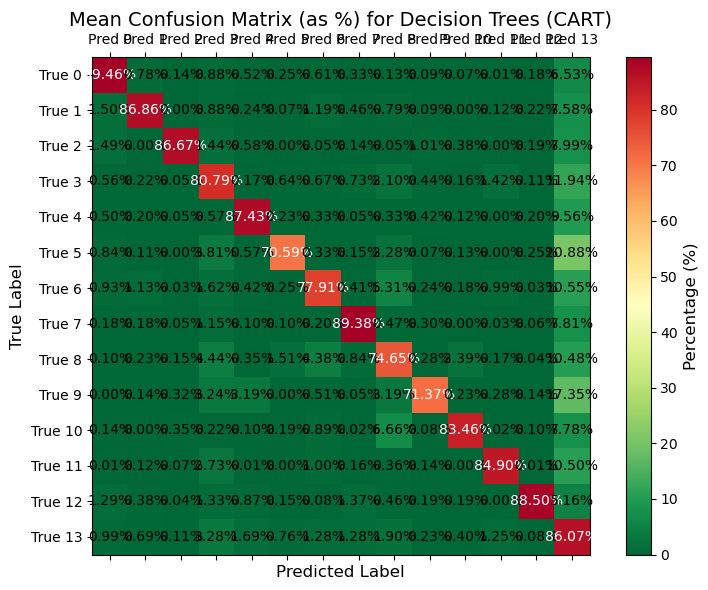

In [17]:
plot_mean_cm(mean_cm = results["Decision Trees (CART)"]["Mean CM"], model_name = "Decision Trees (CART)")

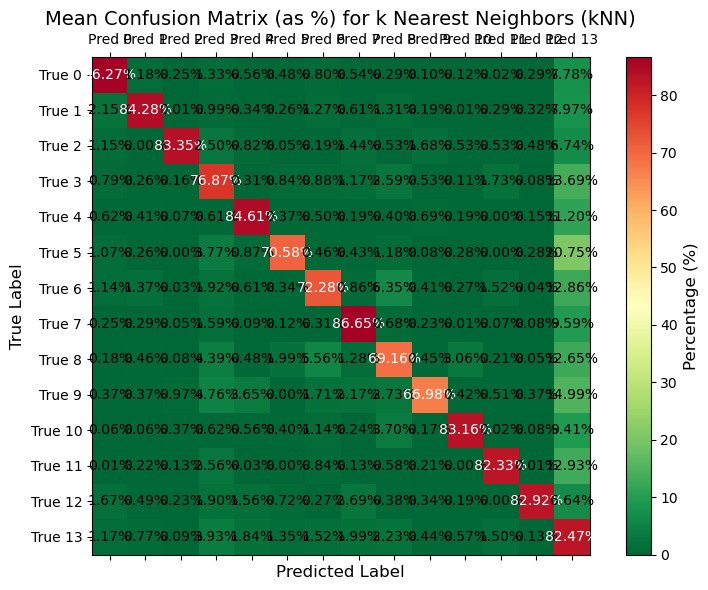

In [18]:
plot_mean_cm(mean_cm = results["k Nearest Neighbors (kNN)"]["Mean CM"], model_name = "k Nearest Neighbors (kNN)")

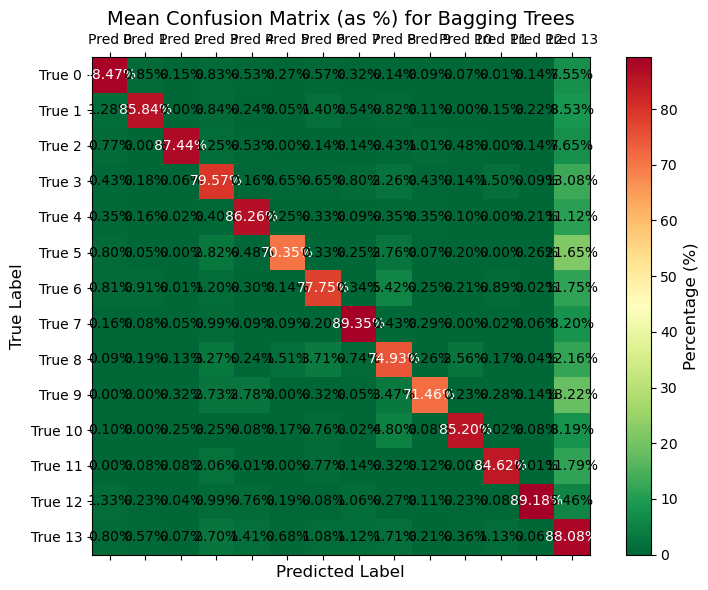

In [19]:
plot_mean_cm(mean_cm = results["Bagging Trees"]["Mean CM"], model_name = "Bagging Trees")

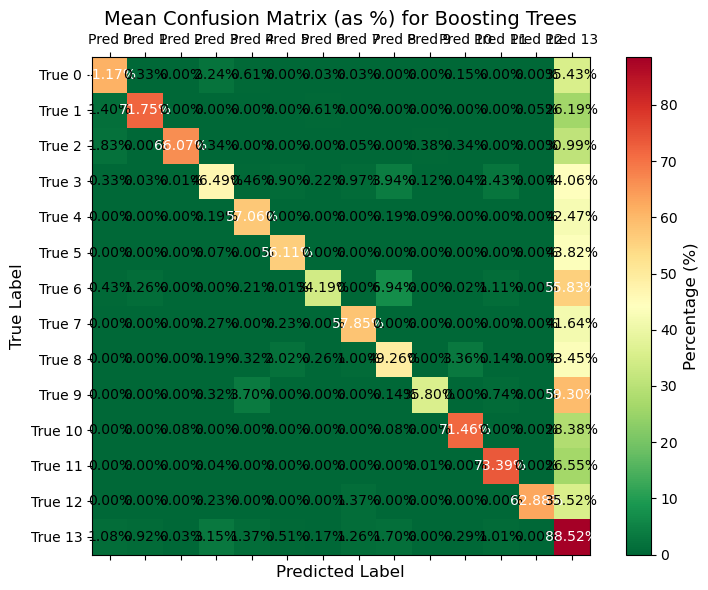

In [20]:
plot_mean_cm(mean_cm = results["Boosting Trees"]["Mean CM"], model_name = "Boosting Trees")

From these matrixes, we see how the different models seem pretty good at classifying, except for our boosting trees. Note that in each cases, the class "other" is very poorly classified, this was expected as it is a very heterogeneous class.

We could mention to which extent are our features imbalanced (way too much "other" namely). We know how to resolve this: weighted confusion matrixes.

We should (at least for the PDF version), find a nice way to plot confusion matrixes.